In [1]:
#LIBRERIAS******************************************************************************************************
import yfinance as yf
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#DESCARGAMOS LOS VALORES DE LA M2********************************************************************************************************

import pandas_datareader.data as web
import datetime as dt
import pandas as pd

# --- Parámetros de la Descarga ---
# Símbolo oficial para la M2 Desestacionalizada en FRED (Federal Reserve Economic Data)
codigo_m2 = 'M2SL' 
fuente_datos = 'fred'

# Rango de fechas solicitado: 30/09/2014 hasta 30/09/2025
fecha_inicio = dt.datetime(2014, 10, 1) 
fecha_fin = dt.datetime(2025, 9, 1) # Usamos el 1 de octubre para asegurar el dato de cierre de septiembre

nombre_archivo = "M2_EEUU_Mensual_2014_2025.csv"

# 1. Descargar los datos mensuales directamente en un DataFrame
#print(f"Descargando datos mensuales de M2 ({codigo_m2}) desde FRED...")
try:
    # La M2 ya se publica con frecuencia mensual, por lo que no necesita 'resample'
    df_m2 = web.DataReader(codigo_m2, fuente_datos, fecha_inicio, fecha_fin)
except Exception as e:
    print(f"Error al descargar datos de FRED: {e}")
    print("Asegúrate de tener instalada la librería 'pandas-datareader'.")
    exit()

# 2. Formato del DataFrame
df_m2.index.name = 'Fecha'
df_m2.columns = ['m2'] # La serie 'M2SL' suele estar en miles de millones (Billions)

# 3. Guardar el DataFrame a un archivo CSV
#df_m2.to_csv(nombre_archivo)
df_m2.to_csv('m2_mensual.csv', index=True)


print (f"datos de m2 es {len (df_m2['m2'])} valores en la columna")  
#se demuestra que tenemos 131 valores que son los valores que ajustamos en el resto de dataframes

df_m2 = df_m2.reset_index(drop=False)

df_m2.head(2)

datos de m2 es 131 valores en la columna


,Fecha,m2
0,2014-10-01,11577.5
1,2014-11-01,11618.2


In [3]:
#DESCARGAMOS LOS VALORES DE BITCOIN********************************************************************************************************

import yfinance as yf
import pandas as pd
import datetime as dt

# 1. Definir el símbolo y el rango de fechas
simbolo_btc = "BTC-USD"
fecha_inicio = "2014-09-17" # Aproximadamente cuando Yahoo Finance comienza a tener datos
fecha_fin = "2025-09-30"

# 2. Descargar los datos diarios en un DataFrame
df_diario = yf.download(simbolo_btc, start=fecha_inicio, end=fecha_fin, auto_adjust=False)



#  Convertir el índice a tipo datetime (por si no lo está)
df_diario.index = pd.to_datetime(df_diario.index)

# Convertir de diario a mensual tomando el último valor de cierre de cada mes
df_btc = df_diario['Close'].resample('ME').last()

# Mostrar los resultados
#print(df_mensual.head())




# 3. Convertir los datos de "Cierre" (Close) de diario a mensual
# Utilizamos .resample('M') para agrupar por mes y .last() para tomar el precio de cierre del último día del mes.
#df_mensual = df_diario['Close'].resample('M').last().to_frame()

# Opcional: renombrar el índice y la columna
df_btc.index.name = 'Fecha'
df_btc.columns = ['P_btc']

df_btc = df_btc.iloc[:-2] 
print (f" datos de SP son {len (df_btc['P_btc'])} VALORES EN LA COLUMNA ")
# lo dejamos en 131 datos para unificar criterios (la m2 solo tiene 131 valores porque no esta actualizado como los demas datos)

df_btc = df_btc.reset_index(drop=False)
df_btc.head(2)

[*********************100%***********************]  1 of 1 completed

 datos de SP son 131 VALORES EN LA COLUMNA 


,Fecha,P_btc
0,2014-09-30,386.944000
1,2014-10-31,338.321014


In [4]:
# --- Parámetros de la Descarga PARA LA SERIE SP 500 ---*********************************************************
simbolo_sp500 = "^GSPC" # Símbolo del S&P 500 en Yahoo Finance
# El rango de fechas solicitado: 30/09/2014 hasta 30/09/2025
# Ajustamos para que yfinance incluya todos los datos hasta el mes de fin.
fecha_inicio = "2014-09-01" 
fecha_fin = "2025-10-01" # Usamos el 1 de octubre para asegurar el dato de cierre de septiembre

nombre_archivo = "SP500_Mensual_2014_2025.csv"

# 1. Descargar los datos diarios en un DataFrame

try:
    df_diario = yf.download(simbolo_sp500, start=fecha_inicio, end=fecha_fin, auto_adjust=False)
except Exception as e:
    print(f"Error al descargar datos: {e}")
    exit()

# 2. Convertir los datos de "Cierre" (Close) de diario a mensual
# Agrupamos por mes ('M') y tomamos el precio de cierre del último día del mes (.last())

df_sp = df_diario['Close'].resample('ME').last()
#df_mensual = df_diario['Close'].resample('M').last().to_frame()

# Limpieza y formato
df_sp.index.name = 'Fecha'
df_sp.columns = ['Precio_Cierre_SP500_USD']

# 3. Guardar el DataFrame mensual a un archivo CSV
df_sp.to_csv('sp500_mensual.csv', index=True)

df_sp = df_sp.iloc[:-2] 
#df_sp = df.drop(df.index[-2:])
print (f" datos de SP son {len (df_sp['Precio_Cierre_SP500_USD'])} VALORES EN LA COLUMNA ")
#lo dejamos en 131 datos para unificar criterios (la m2 solo tiene 131 valores porque no esta actualizado como los demas datos)

df_sp = df_sp.reset_index(drop=False)
df_sp.head(2)

[*********************100%***********************]  1 of 1 completed

 datos de SP son 131 VALORES EN LA COLUMNA 


,Fecha,Precio_Cierre_SP500_USD
0,2014-09-30,1972.290039
1,2014-10-31,2018.050049


In [5]:
#DESCARGAMOS LOS VALORES DEL ORO********************************************************************************************************


import yfinance as yf
import pandas as pd
import datetime as dt

# --- Parámetros de la Descarga ---
# Símbolo para el Contrato de Futuro de Oro (Gold Futures) en Yahoo Finance
simbolo_oro = "GC=F" 

# Rango de fechas solicitado: 30/09/2014 hasta 30/09/2025
fecha_inicio = "2014-09-01" 
fecha_fin = "2025-10-01" # Usamos el 1 de octubre para asegurar el dato de cierre de septiembre

nombre_archivo = "Precio_Oro_Mensual_2014_2025.csv"

# 1. Descargar los datos diarios en un DataFrame
try:
    # yfinance utiliza la fecha de inicio y la fecha de fin para el rango.
    df_diario = yf.download(simbolo_oro, start=fecha_inicio, end=fecha_fin, auto_adjust=False)
except Exception as e:
    print(f"Error al descargar datos: {e}")
    exit()

# 2. Convertir los datos de "Cierre" (Close) de diario a mensual
# Agrupamos por mes ('M') y tomamos el precio de cierre del último día del mes (.last())
#print("Convirtiendo datos diarios a mensuales...")
# Verifica si el DataFrame tiene datos (podría fallar si el símbolo fue incorrecto)
if df_diario.empty:
    print("No se encontraron datos. Verifique el símbolo.")
    exit()

df_oro = df_diario['Close'].resample('ME').last()
#nombre_archivo ="sp500_mensual.csv"
# Limpieza y formato
df_oro.index.name = 'Fecha'
df_oro.columns = ['P_oro'] # Precio por onza troy en USD

# 3. Guardar el DataFrame mensual a un archivo CSV
df_oro.to_csv('oro_mensual.csv' , index=True )
df_oro = df_oro.iloc[:-2]  
print (f" datos de Oro son {len (df_oro['P_oro'])} valores en la columna")
#lo dejamos en 131 datos para unificar criterios (la m2 solo tiene 131 valores porque no esta actualizado como los demas datos)

df_oro = df_oro.reset_index(drop=False)
df_oro.head(2)

[*********************100%***********************]  1 of 1 completed

 datos de Oro son 131 valores en la columna


,Fecha,P_oro
0,2014-09-30,1210.500000
1,2014-10-31,1171.099976


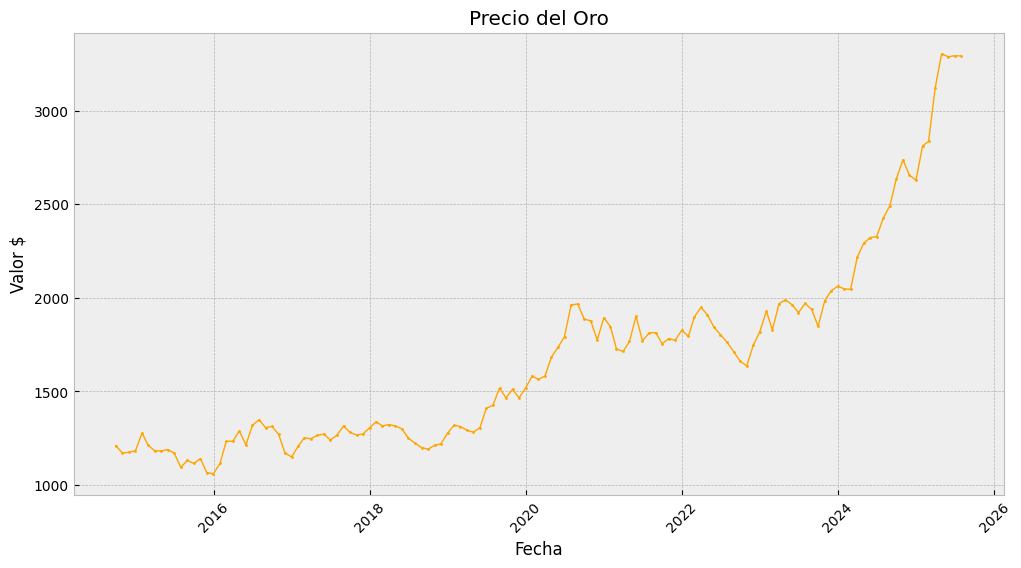

In [6]:
#GRAFICAMOS ORO*************************************************
import matplotlib.pyplot as plt
plt.style.use("bmh")

plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Graficar línea con personalización
plt.plot(df_oro['Fecha'], 
         df_oro['P_oro'], 
         linestyle='solid',      # Estilo de línea: 'solid', 'dashed', 'dotted', etc.
         color='orange',           # Color de la línea
         linewidth=1,            # Grosor de la línea
         marker='o',             # Marcadores en puntos ('o', '^', 's', etc.)
         markersize=1,           # Tamaño de los marcadores
         markerfacecolor='orange',  # Color interior de los marcadores
         markeredgecolor='orange')# Color del borde de los marcadores

# Añadir título y etiquetas de ejes
plt.title('Precio del Oro')
plt.xlabel('Fecha')
plt.ylabel('Valor $')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

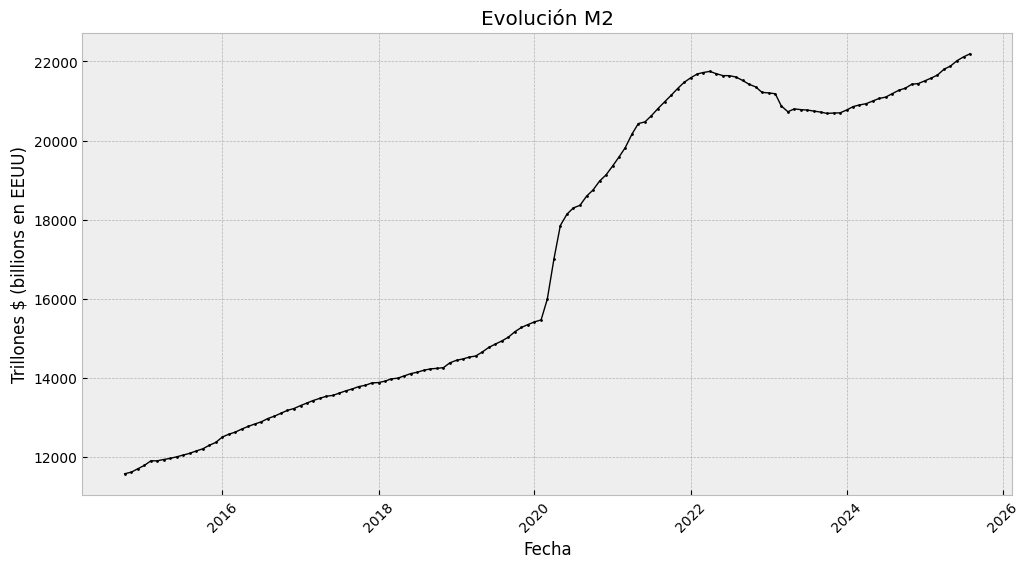

In [7]:
#GRAFICAMOS m2*************************************************
import matplotlib.pyplot as plt
plt.style.use("bmh")

plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Graficar línea con personalización
plt.plot(df_m2['Fecha'], 
         df_m2['m2'], 
         linestyle='solid',      # Estilo de línea: 'solid', 'dashed', 'dotted', etc.
         color='black',           # Color de la línea
         linewidth=1,            # Grosor de la línea
         marker='o',             # Marcadores en puntos ('o', '^', 's', etc.)
         markersize=1,           # Tamaño de los marcadores
         markerfacecolor='black',  # Color interior de los marcadores
         markeredgecolor='black')# Color del borde de los marcadores

# Añadir título y etiquetas de ejes
plt.title('Evolución M2')
plt.xlabel('Fecha')
plt.ylabel('Trillones $ (billions en EEUU)')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [8]:
print (f" COLUMNAS SP: {len(df_sp['Precio_Cierre_SP500_USD'])}")
print (f" COLUMNAS SP: {len(df_oro['P_oro'])}")
print (f" COLUMNAS SP: {len(df_m2['m2'])}")
print (f" COLUMNAS SP: {len(df_btc['P_btc'])}")

 COLUMNAS SP: 131
 COLUMNAS SP: 131
 COLUMNAS SP: 131
 COLUMNAS SP: 131


In [9]:
#unimos los 4 DF EN 1 SOLO:

import pandas as pd

# Supongamos que tienes tres DataFrames con índice de fechas
# y quieres construir un nuevo DataFrame manualmente con columnas extraídas:

df_unido = pd.DataFrame({
    'Date': df_m2['Fecha'],
    'SP500($)': df_sp['Precio_Cierre_SP500_USD'],
    'Gold ($/oz)': df_oro['P_oro'],
    'm2 (Billions $)': df_m2['m2'],
    'Bitcoin price ($/unit)': df_btc['P_btc']
    
})

#el indice de la suma es el indice del nuevo df creado:
#df_unido.index = df_oro.index  # asumiendo que todos tienen el mismo índice

#posible variante que no ha hecho falta
#df_unido.index = pd.date_range(start='2014-09-30', end='2025-09-30', freq='M')
#df_unido.head(5)



In [10]:
df_unido.head(2)

,Date,SP500($),Gold ($/oz),m2 (Billions $),Bitcoin price ($/unit)
0,2014-10-01,1972.290039,1210.500000,11577.5,386.944000
1,2014-11-01,2018.050049,1171.099976,11618.2,338.321014


In [11]:

df_unido.to_excel('prueba_sabado.xlsx')

In [12]:
type (df_unido['Date'][2])


pandas._libs.tslibs.timestamps.Timestamp

In [13]:
df_unido4 = df_unido.iloc[:, -4:]

In [14]:
df_unido4.corr()

,SP500($),Gold ($/oz),m2 (Billions $),Bitcoin price ($/unit)
SP500($),1.000000,0.934267,0.916349,0.939063
Gold ($/oz),0.934267,1.000000,0.827583,0.927395
m2 (Billions $),0.916349,0.827583,1.000000,0.790335
Bitcoin price ($/unit),0.939063,0.927395,0.790335,1.000000


<Axes: >

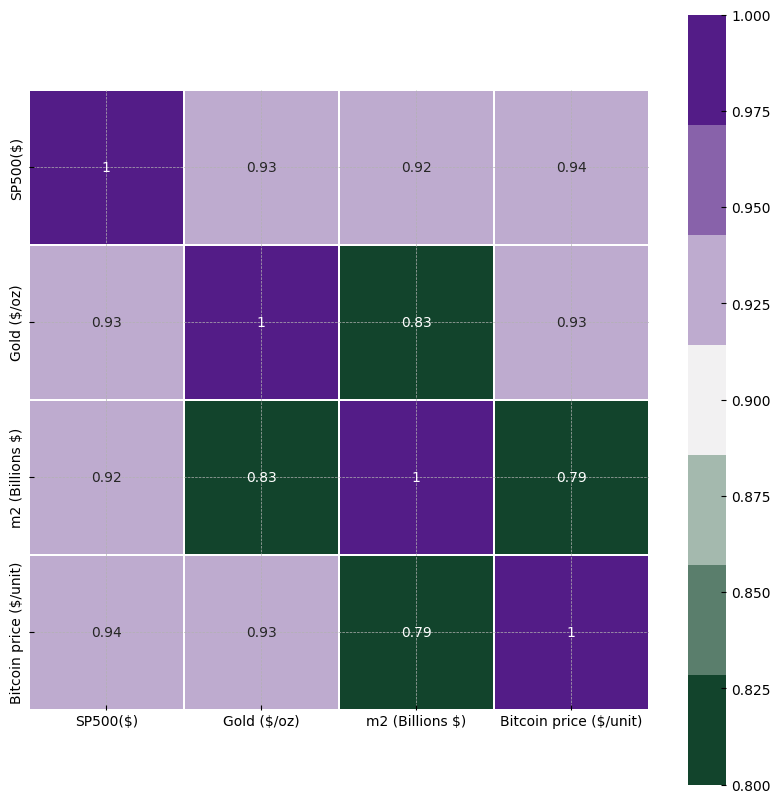

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df_unido4.corr(),
            vmin=.8,
            vmax=1,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True,
            linewidths=.1,
            annot=True)

In [16]:
#VEMOS EL ASPECTO GENERAL
df_sp.head()
#print("...")
#df_mensual.tail()

,Fecha,Precio_Cierre_SP500_USD
0,2014-09-30,1972.290039
1,2014-10-31,2018.050049
2,2014-11-30,2067.560059
3,2014-12-31,2058.899902
4,2015-01-31,1994.989990


In [17]:
#comprobamos el tipo de valor de la columna precio cierre
df_sp['Precio_Cierre_SP500_USD'].iloc[1]

np.float64(2018.050048828125)

In [18]:
#comprobamos el minimo de los valores. En el excel exportado visualizo valores minimos diferentes!
df_sp['Precio_Cierre_SP500_USD'].min()

np.float64(1920.030029296875)

In [19]:
df_sp.describe()

,Fecha,Precio_Cierre_SP500_USD
count,131,131.000000
mean,2020-02-29 13:11:27.022900736,3462.712901
min,2014-09-30 00:00:00,1920.030029
25%,2017-06-15 00:00:00,2417.604980
50%,2020-02-29 00:00:00,3044.310059
75%,2022-11-15 00:00:00,4302.520020
max,2025-07-31 00:00:00,6339.390137
std,NaN,1226.457088


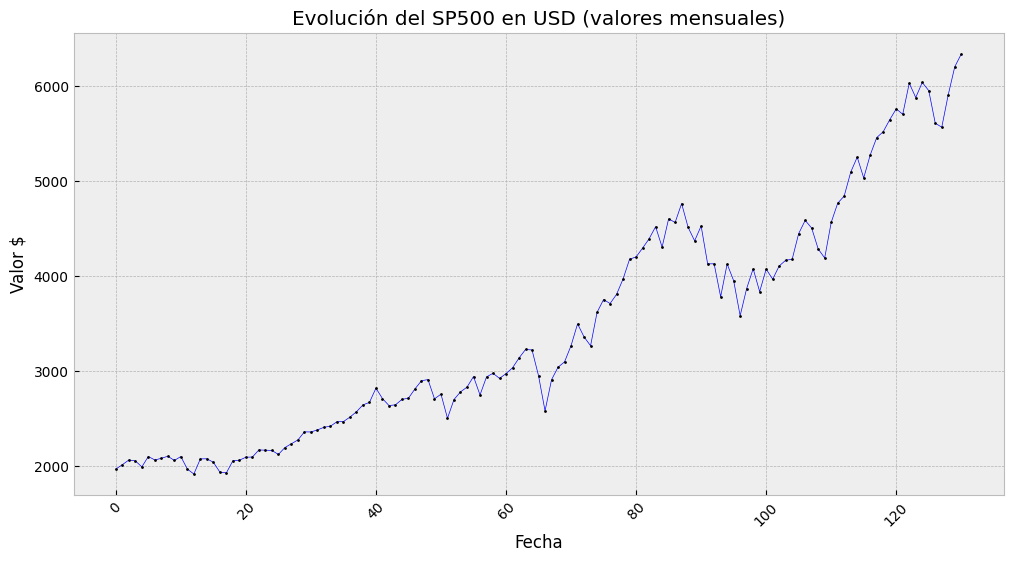

In [20]:
#GRAFICAMOS SP500
import matplotlib.pyplot as plt
plt.style.use("bmh")

plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Graficar línea con personalización
plt.plot(df_sp.index, 
         df_sp['Precio_Cierre_SP500_USD'], 
         linestyle='solid',      # Estilo de línea: 'solid', 'dashed', 'dotted', etc.
         color='blue',           # Color de la línea
         linewidth=0.5,            # Grosor de la línea
         marker='o',             # Marcadores en puntos ('o', '^', 's', etc.)
         markersize=1,           # Tamaño de los marcadores
         markerfacecolor='red',  # Color interior de los marcadores
         markeredgecolor='black')# Color del borde de los marcadores

# Añadir título y etiquetas de ejes
plt.title('Evolución del SP500 en USD (valores mensuales)')
plt.xlabel('Fecha')
plt.ylabel('Valor $')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

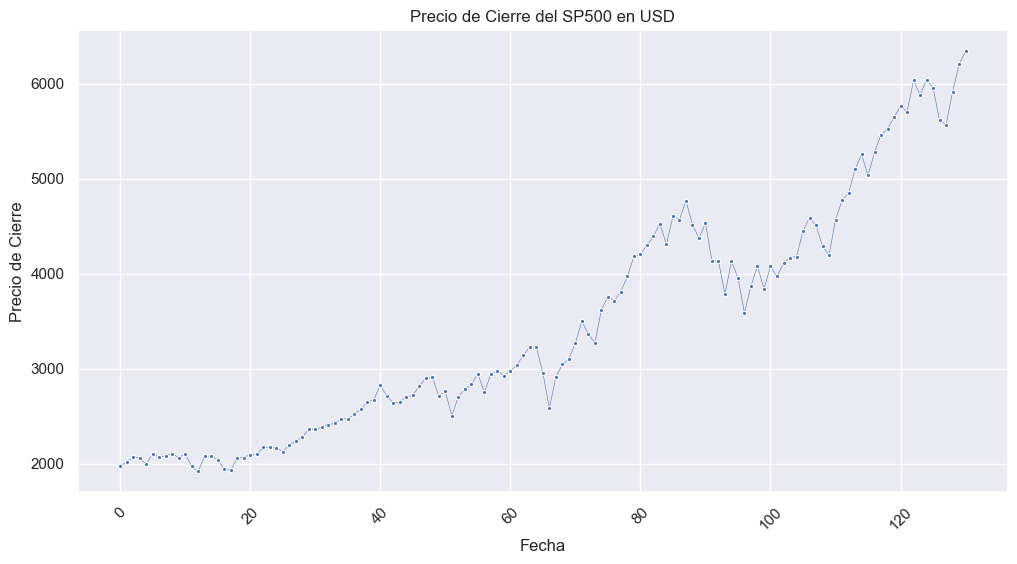

In [21]:
#OTRO TIPO DE GRÁFICA

import seaborn as sns
import matplotlib.pyplot as plt

df_reset = df_sp.reset_index()

sns.set_theme(style="darkgrid")  # Tema y estilo de la gráfica

plt.figure(figsize=(12,6))
sns.lineplot(data=df_reset, x=df_reset.columns[0], y='Precio_Cierre_SP500_USD',
             marker='o',markersize =3, linewidth=0.4)

plt.title('Precio de Cierre del SP500 en USD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.xticks(rotation=45)
plt.show()

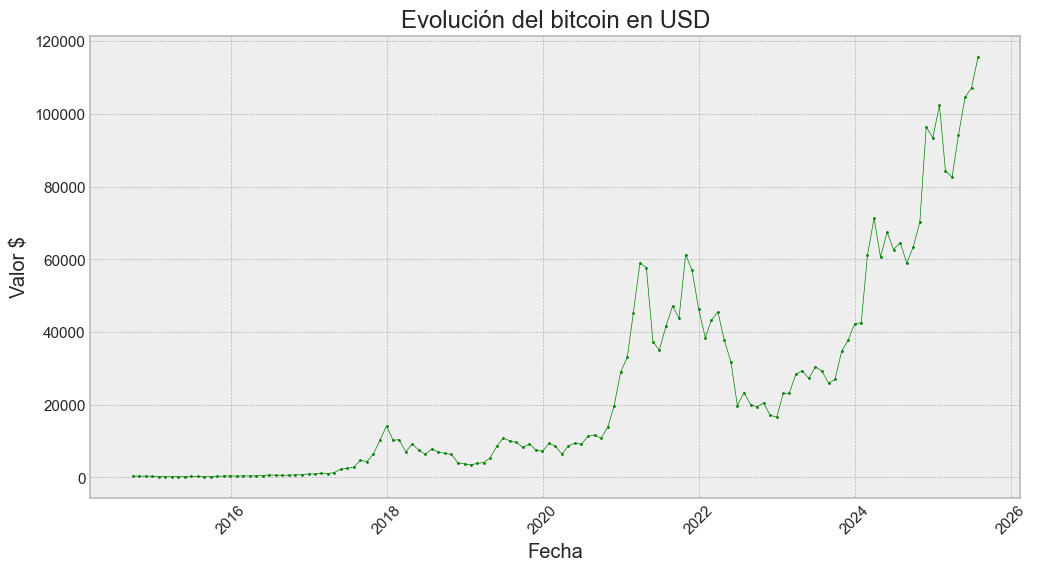

In [22]:
#GRAFICAMOS bitcoin*********************************************
import matplotlib.pyplot as plt
plt.style.use("bmh")

plt.figure(figsize=(12, 6))  # Tamaño de la figura

# Graficar línea con personalización
plt.plot(df_btc['Fecha'], 
         df_btc['P_btc'], 
         linestyle='solid',      # Estilo de línea: 'solid', 'dashed', 'dotted', etc.
         color='green',           # Color de la línea
         linewidth=0.5,            # Grosor de la línea
         marker='o',             # Marcadores en puntos ('o', '^', 's', etc.)
         markersize=1,           # Tamaño de los marcadores
         markerfacecolor='green',  # Color interior de los marcadores
         markeredgecolor='green')# Color del borde de los marcadores

# Añadir título y etiquetas de ejes
plt.title('Evolución del bitcoin en USD')
plt.xlabel('Fecha')
plt.ylabel('Valor $')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [23]:
df_m2['Fecha'].tail()

126   2025-04-01
127   2025-05-01
128   2025-06-01
129   2025-07-01
130   2025-08-01
Name: Fecha, dtype: datetime64[ns]

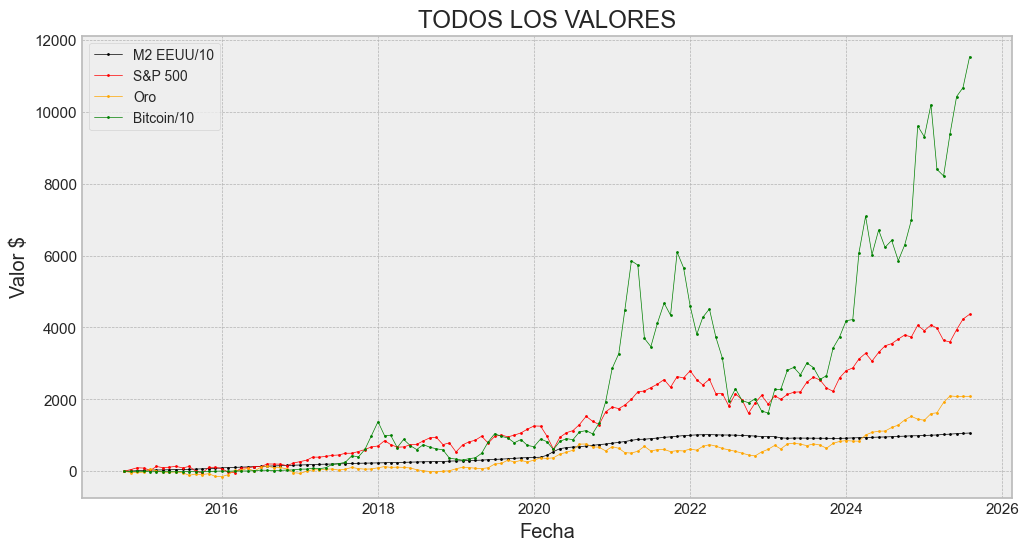

In [51]:
#GRAFICAMOS todos los DF
import matplotlib.pyplot as plt
plt.style.use("bmh")

plt.figure(figsize=(12, 6))  # Tamaño de la figura
x = df_m2['Fecha']
y1 = df_m2['m2']
y2 = df_sp['Precio_Cierre_SP500_USD']
y3 = df_oro['P_oro']
y4 = df_btc['P_btc']

y1_inicio = y1.iloc[0] if hasattr(y1, 'iloc') else y1[0]
y2_inicio = y2.iloc[0] if hasattr(y2, 'iloc') else y2[0]
y3_inicio = y3.iloc[0] if hasattr(y3, 'iloc') else y3[0]
y4_inicio = y4.iloc[0] if hasattr(y4, 'iloc') else y4[0]

# Normaliza restando el valor inicial
y1_norm = y1 - y1_inicio
y2_norm = y2 - y2_inicio
y3_norm = y3 - y3_inicio
y4_norm = y4 - y4_inicio

# Graficar línea con personalización
plt.plot(x, (y1_norm/10), label='M2 EEUU/10', color='black', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='black', markeredgecolor = 'black')
plt.plot(x, (y2_norm), label='S&P 500', color='red', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='red', markeredgecolor = 'red')
plt.plot(x, (y3_norm), label='Oro', color='orange', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='orange', markeredgecolor = 'orange')
plt.plot(x, (y4_norm/10), label='Bitcoin/10', color='green', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='green', markeredgecolor = 'green')

plt.legend(loc='upper left', fontsize=10)

'''
         linestyle='solid',      # Estilo de línea: 'solid', 'dashed', 'dotted', etc.
         color='blue',           # Color de la línea
         linewidth=0.5,            # Grosor de la línea
         marker='o',             # Marcadores en puntos ('o', '^', 's', etc.)
         markersize=1,           # Tamaño de los marcadores
         markerfacecolor='red',  # Color interior de los marcadores
         markeredgecolor='black')# Color del borde de los marcadores


'''

# Añadir título y etiquetas de ejes
plt.title('TODOS LOS VALORES')
plt.xlabel('Fecha')
plt.ylabel('Valor $')


# Rotar etiquetas del eje X para mejor legibilidad
#plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

In [ ]:
#intento de modificar el eje y para que todas las gráficas nazcan en el mismo punto
import plotly.graph_objects as go
#import matplotlib.pyplot as plt
#plt.style.use("bmh")

#plt.figure(figsize=(12, 6))  # Tamaño de la figura
x = df_m2['Fecha']
y1 = df_m2['m2']
y2 = df_sp['Precio_Cierre_SP500_USD']
y3 = df_oro['P_oro']
y4 = df_btc['P_btc']

'''
# Graficar línea con personalización
plt.plot(x, (y1/10), label='Cuadrados', color='black', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='black', markeredgecolor = 'black')
plt.plot(x, (y2), label='Cuadrados', color='red', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='red', markeredgecolor = 'red')
plt.plot(x, (y3), label='Cuadrados', color='orange', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='orange', markeredgecolor = 'orange')
plt.plot(x, (y4/10), label='Cuadrados', color='green', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='green', markeredgecolor = 'green')

'''
# Encuentra el valor inicial de cada una en x = 0
y1_inicio = y1.iloc[0]
y2_inicio = y2.iloc[0]
y3_inicio = y3.iloc[0]
y4_inicio = y4.iloc[0]

# Resta ese valor para que todas empiecen en el mismo valor (en este ejemplo, y=0)
y1_norm = y1 - y1_inicio
y2_norm = y2 - y2_inicio
y3_norm = y3 - y3_inicio
y4_norm = y4 - y4_inicio

fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1_norm, name='Serie 1'))
fig.add_trace(go.Scatter(x=x, y=y2_norm, name='Serie 2'))
fig.add_trace(go.Scatter(x=x, y=y3_norm, name='Serie 3'))
fig.add_trace(go.Scatter(x=x, y=y4_norm, name='Serie 4'))
fig.show()

fig.update_layout(
    xaxis=dict(range=['2017-10-01', '2025-08-01'])
)
fig.write_html("todos.html")
'''
# Añadir título y etiquetas de ejes
plt.title('CORRELACION VARIOS INDICES EE.UU')
plt.xlabel('Fecha')
plt.ylabel('Valor $')


# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()

'''


"\n# Añadir título y etiquetas de ejes\nplt.title('CORRELACION VARIOS INDICES EE.UU')\nplt.xlabel('Fecha')\nplt.ylabel('Valor $')\n\n\n# Rotar etiquetas del eje X para mejor legibilidad\nplt.xticks(rotation=45)\n\n# Mostrar cuadrícula\nplt.grid(True)\n\n# Mostrar la gráfica\nplt.show()\n\n"

In [ ]:
# segundo intento de graficar todas las variables en el mismo punto de inicio**********************************************
# Valor inicial deseado (por ejemplo 0)
inicio = 0

# Normalizar cada serie
for columna in ["a", "b", "c"]:
    plt.plot(df["x"], df[columna] - df[columna].iloc[0] + inicio, label=columna)

plt.legend()
plt.show()

In [66]:
#****graficamos con polty ayudado por la IA****************************************************

import numpy as np
import plotly.graph_objects as go
'''


plt.figure(figsize=(12, 6))  # Tamaño de la figura
x = df_m2['Fecha']
y1 = df_m2['m2']
y2 = df_sp['Precio_Cierre_SP500_USD']
y3 = df_oro['P_oro']
y4 = df_btc['P_btc']
# Graficar línea con personalización
plt.plot(x, (y1/10), label='Cuadrados', color='black', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='black', markeredgecolor = 'black')
plt.plot(x, (y2), label='Cuadrados', color='red', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='red', markeredgecolor = 'red')
plt.plot(x, (y3), label='Cuadrados', color='orange', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='orange', markeredgecolor = 'orange')
plt.plot(x, (y4/10), label='Cuadrados', color='green', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='green', markeredgecolor = 'green')





'''

plt.style.use("bmh")
plt.figure(figsize=(12, 12))  # Tamaño de la figura
# Dominio de las funciones

x = df_m2['Fecha']
y1 = df_m2['m2']
y22 = df_sp['Precio_Cierre_SP500_USD']
y3 = df_oro['P_oro']
y4 = df_btc['P_btc']

# Crea cada traza para la gráfica
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y1, mode='lines', name='M2',  line=dict(color='black', width=1)))
fig.add_trace(go.Scatter(x=x, y=y22, mode='lines', name='SP500', line=dict(color='red', width=1)))
fig.add_trace(go.Scatter(x=x, y=y3, mode='lines', name='Oro', line=dict(color='yellow', width=1)))
fig.add_trace(go.Scatter(x=x, y=y4, mode='lines', name='Btc', line=dict(color='green', width=1), yaxis='y2'))


# pintar con indice a parte
#fig.add_trace(go.Scatter(x=[1,2,3], y=[10,40,90], name='var2', yaxis='y2'))




# Personaliza el gráfico (opcional)
fig.update_layout(
    xaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=1),
    yaxis=dict(showgrid=True, gridcolor='lightgray', gridwidth=1),
    yaxis2=dict( title="Bit", overlaying='y',side='right'), #
    title='Cuatro indices principales entorno EE.UU.',
    xaxis_title='Fecha',
    yaxis_title='$',
    legend_title='Leyenda'
)




fig.update_layout(plot_bgcolor="#D7F3ED")

fig.show()


<Figure size 1200x1200 with 0 Axes>

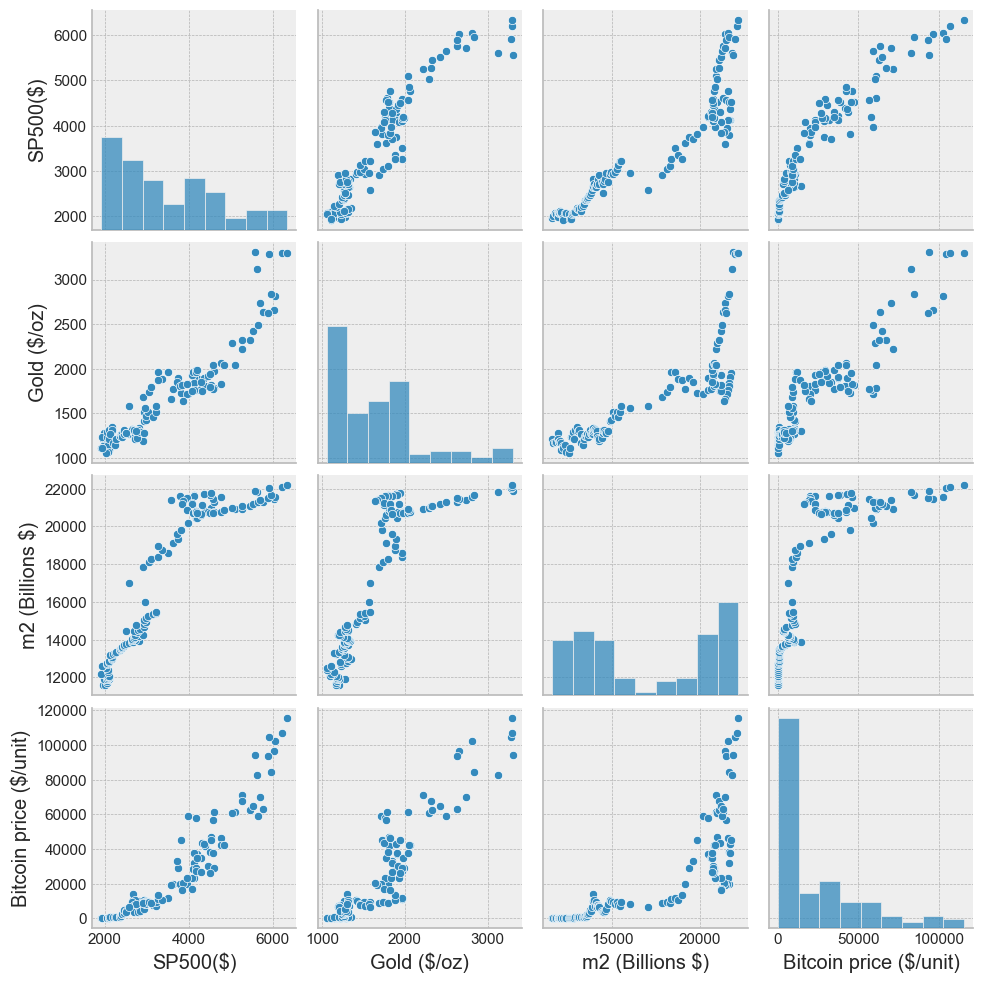

In [ ]:
sns.pairplot(df_unido)

In [26]:
df_unido.head()

,Date,SP500($),Gold ($/oz),m2 (Billions $),Bitcoin price ($/unit)
0,2014-10-01,1972.290039,1210.500000,11577.5,386.944000
1,2014-11-01,2018.050049,1171.099976,11618.2,338.321014
2,2014-12-01,2067.560059,1175.199951,11701.9,378.046997
3,2015-01-01,2058.899902,1183.900024,11788.8,320.192993
4,2015-02-01,1994.989990,1278.500000,11905.6,217.464005


In [ ]:
cols = df_unido.columns[1:5]

# Calcula el porcentaje de variación respecto al primer valor de cada columna
for col in cols:
y1 = (df_unido[col] - df_unido[col].iloc[0]) / df_unido[col].iloc[0] * 100

In [50]:
print (cols)

Index(['SP500($)', 'Gold ($/oz)', 'm2 (Billions $)', 'Bitcoin price ($/unit)'], dtype='object')


In [55]:
df_unido.tail()

,Date,SP500($),Gold ($/oz),m2 (Billions $),Bitcoin price ($/unit),SP500($)_pct,Gold ($/oz)_pct,m2 (Billions $)_pct,Bitcoin price ($/unit)_pct,SP500($)_pct_pct,Gold ($/oz)_pct_pct,m2 (Billions $)_pct_pct
126,2025-04-01,5611.850098,3122.800049,21805.1,82548.914062,184.534728,157.976047,88.340315,21233.555763,inf,inf,inf
127,2025-05-01,5569.060059,3305.000000,21884.6,94207.312500,182.365167,173.027675,89.026992,24246.497798,inf,inf,inf
128,2025-06-01,5911.689941,3288.899902,22022.1,104638.093750,199.737352,171.697638,90.214640,26942.180182,inf,inf,inf
129,2025-07-01,6204.950195,3294.399902,22115.8,107135.335938,214.606375,172.151995,91.023969,27587.555788,inf,inf,inf
130,2025-08-01,6339.390137,3293.199951,22195.4,115758.203125,221.422814,172.052867,91.711509,29816.009307,inf,inf,inf


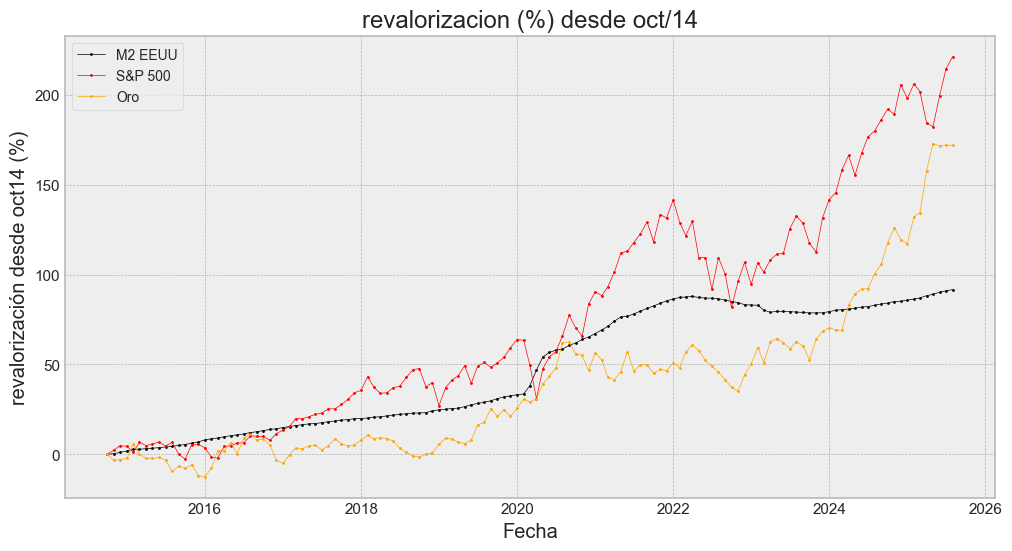

In [58]:
#GRAFICAMOS todos los DF
import matplotlib.pyplot as plt
plt.style.use("bmh")
'''
y1 = (df_unido[col] - df_unido[col].iloc[0]) / df_unido[col].iloc[0] * 100


'''






plt.figure(figsize=(12, 6))  # Tamaño de la figura
x = df_m2['Fecha']
y1 = df_m2['m2']-df_m2['m2'].iloc[0]/df_m2['m2'].iloc[0]*100
y2 = df_sp['Precio_Cierre_SP500_USD']-df_sp['Precio_Cierre_SP500_USD'].iloc[0]/df_sp['Precio_Cierre_SP500_USD'].iloc[0]*100
y3 = df_oro['P_oro']-df_oro['P_oro'].iloc[0]/df_oro['P_oro'].iloc[0]*100
y4 = df_btc['P_btc']-df_btc['P_btc'].iloc[0]/df_btc['P_btc'].iloc[0]*100


y1_inicio = y1.iloc[0] if hasattr(y1, 'iloc') else y1[0]
y2_inicio = y2.iloc[0] if hasattr(y2, 'iloc') else y2[0]
y3_inicio = y3.iloc[0] if hasattr(y3, 'iloc') else y3[0]
y4_inicio = y4.iloc[0] if hasattr(y4, 'iloc') else y4[0]

# Normaliza restando el valor inicial
y1_norm = y1 - y1_inicio
y2_norm = y2 - y2_inicio
y3_norm = y3 - y3_inicio
y4_norm = y4 - y4_inicio

# Graficar línea con personalización
plt.plot(x, df_unido['m2 (Billions $)_pct'], label='M2 EEUU', color='black', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='black', markeredgecolor = 'black')
plt.plot(x, df_unido['SP500($)_pct'], label='S&P 500', color='red', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='red', markeredgecolor = 'red')
plt.plot(x, df_unido['Gold ($/oz)_pct'], label='Oro', color='orange', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='orange', markeredgecolor = 'orange')
#plt.plot(x, (y4), label='Bitcoin/10', color='green', linestyle='solid', linewidth =0.5, marker = 'o', markersize =1, markerfacecolor ='green', markeredgecolor = 'green')

plt.legend(loc='upper left', fontsize=10)

'''
         linestyle='solid',      # Estilo de línea: 'solid', 'dashed', 'dotted', etc.
         color='blue',           # Color de la línea
         linewidth=0.5,            # Grosor de la línea
         marker='o',             # Marcadores en puntos ('o', '^', 's', etc.)
         markersize=1,           # Tamaño de los marcadores
         markerfacecolor='red',  # Color interior de los marcadores
         markeredgecolor='black')# Color del borde de los marcadores


'''

# Añadir título y etiquetas de ejes
plt.title('revalorizacion (%) desde oct/14')
plt.xlabel('Fecha')
plt.ylabel('revalorización desde oct14 (%)')


# Rotar etiquetas del eje X para mejor legibilidad
#plt.xticks(rotation=45)

# Mostrar cuadrícula
plt.grid(True)

# Mostrar la gráfica
plt.show()